##データの取り込み

In [ ]:
#基本ライブラリのインポート
!pip install japanize_matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import japanize_matplotlib
import seaborn as sns
import pandas as pd
import numpy as np
sns.set(font="IPAexGothic",style="white")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#ファイルの読み込み
import codecs
with codecs.open('/content/drive/MyDrive/data/spam_train_data.csv', 'r', 'utf-8', 'ignore') as f:
    df = pd.read_csv(f)
df.columns = ["ID", "Class", "Message"]
df.head()

,ID,Class,Message
0,1,ham,"Go until jurong point, crazy.. Available only ..."
1,2,ham,Ok lar... Joking wif u oni...
2,3,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,5,ham,"Nah I don't think he goes to usf, he lives aro..."
4,6,spam,FreeMsg Hey there darling it's been 3 week's n...


In [ ]:
#テストデータ読み込み
df_test=pd.read_csv("/content/drive/MyDrive/data/spam_submit_data.csv")
df_test.columns = ["ID", "Message"]
df_test.head()

,ID,Message
0,4,U dun say so early hor... U c already then say...
1,8,As per your request 'Melle Melle (Oru Minnamin...
2,17,Oh k...i'm watching here:)
3,18,Eh u remember how 2 spell his name... Yes i di...
4,22,I���m going to try for 2 months ha ha only joking


##EDA

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,4179.0,2777.861689,1615.143094,1.0,1367.5,2768.0,4184.0,5572.0


In [ ]:
df.isnull().sum()

ID         0
Class      0
Message    0
dtype: int64

ham     3622
spam     557
Name: Class, dtype: int64


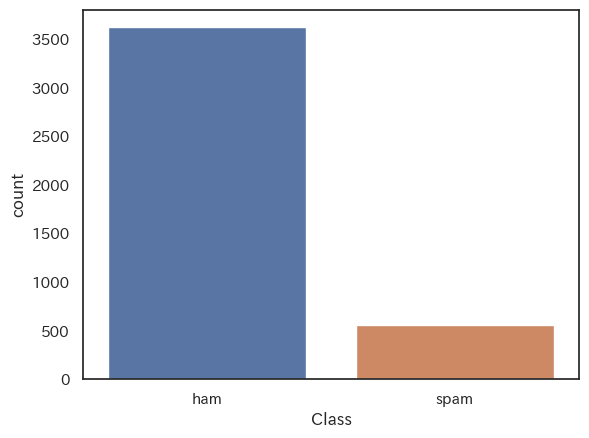

In [ ]:
print(df["Class"].value_counts())
sns.countplot(x="Class",data=df);

In [ ]:
#スパムメールの内容
df[df["Class"] == "spam"]["Message"].head(30)

2      Free entry in 2 a wkly comp to win FA Cup fina...
4      FreeMsg Hey there darling it's been 3 week's n...
6      WINNER!! As a valued network customer you have...
7      Had your mobile 11 months or more? U R entitle...
9      SIX chances to win CASH! From 100 to 20,000 po...
10     URGENT! You have won a 1 week FREE membership ...
13     XXXMobileMovieClub: To use your credit, click ...
15     England v Macedonia - dont miss the goals/team...
26     Thanks for your subscription to Ringtone UK yo...
34     07732584351 - Rodger Burns - MSG = We tried to...
43     SMS. ac Sptv: The New Jersey Devils and the De...
45     Congrats! 1 year special cinema pass for 2 is ...
51     As a valued customer, I am pleased to advise y...
53     Did you hear about the new \Divorce Barbie\"? ...
84     GENT! We are trying to contact you. Last weeke...
86     You are a winner U have been specially selecte...
89     Todays Voda numbers ending 7548 are selected t...
97     Sunshine Quiz Wkly Q! Wi

In [ ]:
#通常メールの内容
df[df["Class"] == "ham"]["Message"].head(30)

0     Go until jurong point, crazy.. Available only ...
1                         Ok lar... Joking wif u oni...
3     Nah I don't think he goes to usf, he lives aro...
5     Even my brother is not like to speak with me. ...
8     I'm gonna be home soon and i don't want to tal...
11    I've been searching for the right words to tha...
12                  I HAVE A DATE ON SUNDAY WITH WILL!!
14    Fine if that��s the way u feel. That��s the wa...
16            Is that seriously how you spell his name?
17    Aft i finish my lunch then i go str down lor. ...
18    Ffffffffff. Alright no way I can meet up with ...
19    Just forced myself to eat a slice. I'm really ...
20                       Lol your always so convincing.
21    Ahhh. Work. I vaguely remember that! What does...
22    Wait that's still not all that clear, were you...
23    Yeah he got in at 2 and was v apologetic. n ha...
24                        K tell me anything about you.
25    For fear of fainting with the of all that 

<ipython-input-28-26fef05706a0>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df["Class"]=="ham"]["exc_len"],kde=False,label="ham");
<ipython-input-28-26fef05706a0>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df["Class"]=="spam"]["exc_len"],kde=False,label="spam");


(0.0, 4.0)

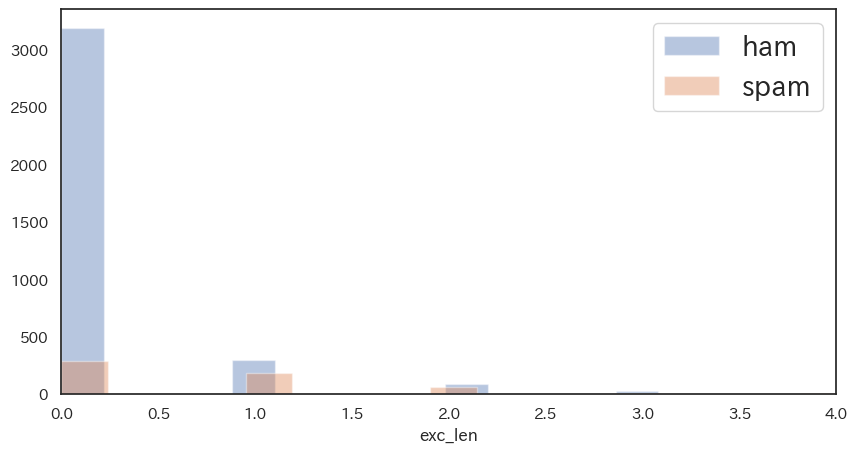

In [ ]:
#文章中の「!」の数をカウント
df['exc_len'] = df["Message"].apply(lambda x: x.count("!"))
df_test['exc_len'] = df_test["Message"].apply(lambda x: x.count("!"))
plt.figure(figsize=(10,5))
sns.distplot(df[df["Class"] == "ham"]["exc_len"], kde=False, label="ham");
sns.distplot(df[df["Class"] == "spam"]["exc_len"], kde=False, label="spam");
plt.legend(fontsize=20)
plt.xlim(0,4)

<ipython-input-29-1278fbeb29c3>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df["Class"]=="ham"]["Message_len"],kde=False,label="ham");
<ipython-input-29-1278fbeb29c3>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df["Class"]=="spam"]["Message_len"],kde=False,label="spam");


(0.0, 400.0)

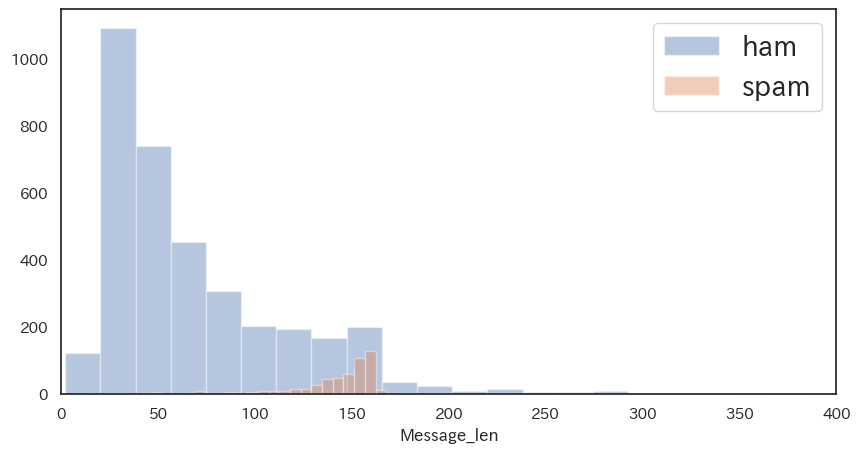

In [ ]:
#文章の文字数をカウント
df['Message_len'] = df.Message.apply(len)
df_test['Message_len'] = df_test.Message.apply(len)
plt.figure(figsize=(10,5))
sns.distplot(df[df["Class"] == "ham"]["Message_len"], kde=False, label="ham");
sns.distplot(df[df["Class"] == "spam"]["Message_len"], kde=False, label="spam");
plt.legend(fontsize=20)
plt.xlim(0,400)

In [ ]:
#文章のクリーニングに必要なモジュールのインポート
!pip install scikit-plot
!pip install nltk
import nltk
import re
from nltk.corpus import stopwords
nltk.download('stopwords')
STOPWORDS = stopwords.words('english')
#STOPWORDS→解析に必要ない単語のリスト

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
#文字を全て小文字に→英数字以外を削除→複数の空白を削除→STOPWORDSでない単語のみ抜き出して文章を再構築(clean_msg)
def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^0-9a-zA-Z]', ' ', text)
    text = re.sub(r'\s+', ' ', text)
    text = " ".join(word for word in text.split() if word not in STOPWORDS)
    return text

df['clean_msg'] = df.Message.apply(clean_text)
df_test["clean_msg"] = df_test.Message.apply(clean_text)
df.head()

,ID,Class,Message,exc_len,Message_len,clean_msg
0,1,ham,"Go until jurong point, crazy.. Available only ...",0,111,go jurong point crazy available bugis n great ...
1,2,ham,Ok lar... Joking wif u oni...,0,29,ok lar joking wif u oni
2,3,spam,Free entry in 2 a wkly comp to win FA Cup fina...,0,155,free entry 2 wkly comp win fa cup final tkts 2...
3,5,ham,"Nah I don't think he goes to usf, he lives aro...",0,61,nah think goes usf lives around though
4,6,spam,FreeMsg Hey there darling it's been 3 week's n...,2,147,freemsg hey darling 3 week word back like fun ...


<Axes: >

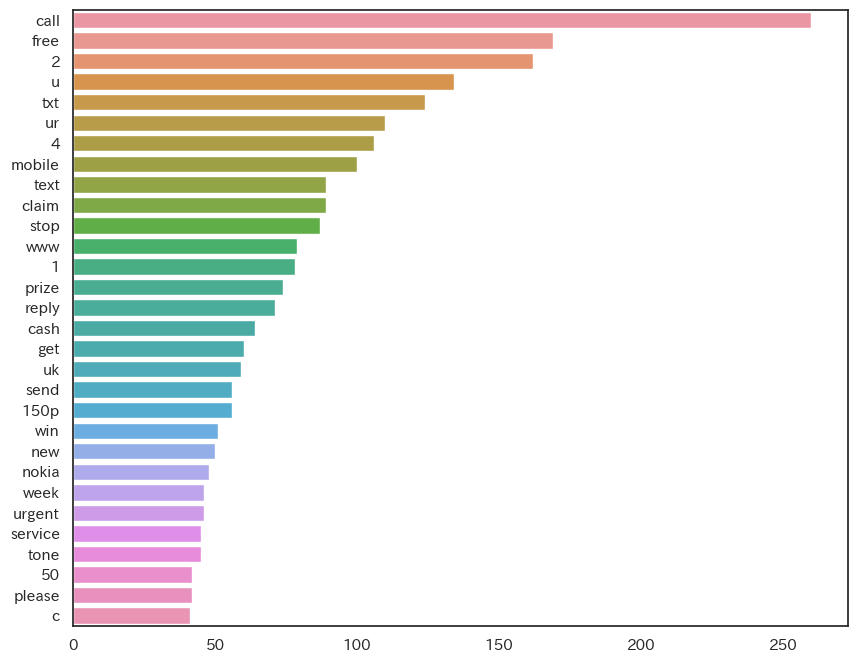

In [ ]:
#スパムによく使われている単語を探索
from collections import Counter
words = df[df.Class=='spam'].clean_msg.apply(lambda x: [word.lower() for word in x.split()])
spam_words = Counter()
for msg in words:
    spam_words.update(msg)

x = [x[1] for x in spam_words.most_common(30)][:30]
y = [label[0] for label in spam_words.most_common(30)][:30]
plt.figure(figsize=(10, 8))
sns.barplot(x=x,y=y)

<Axes: >

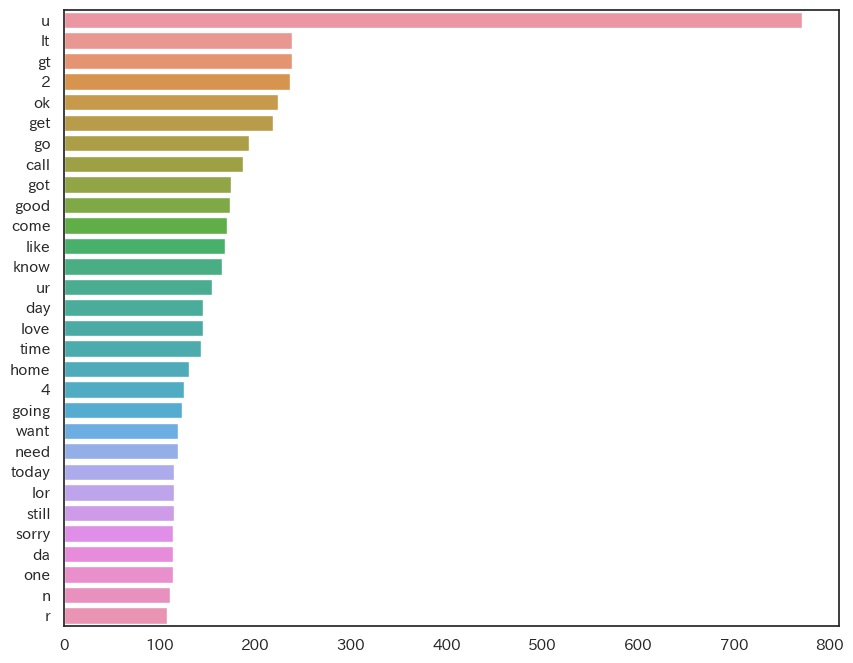

In [ ]:
#通常メールによく使われている単語を探索
from collections import Counter

words = df[df.Class=='ham'].clean_msg.apply(lambda x: [word.lower() for word in x.split()])
ham_words = Counter()
for msg in words:
    ham_words.update(msg)

x = [x[1] for x in ham_words.most_common(30)][:30]
y = [label[0] for label in ham_words.most_common(30)][:30]
plt.figure(figsize=(10, 8))
sns.barplot(x=x,y=y)

<ipython-input-34-1f3c40ff8a8a>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df["Class"]=="ham"]["clean_msg_len"],kde=False,label="ham");
<ipython-input-34-1f3c40ff8a8a>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df["Class"]=="spam"]["clean_msg_len"],kde=False,label="spam");


(0.0, 400.0)

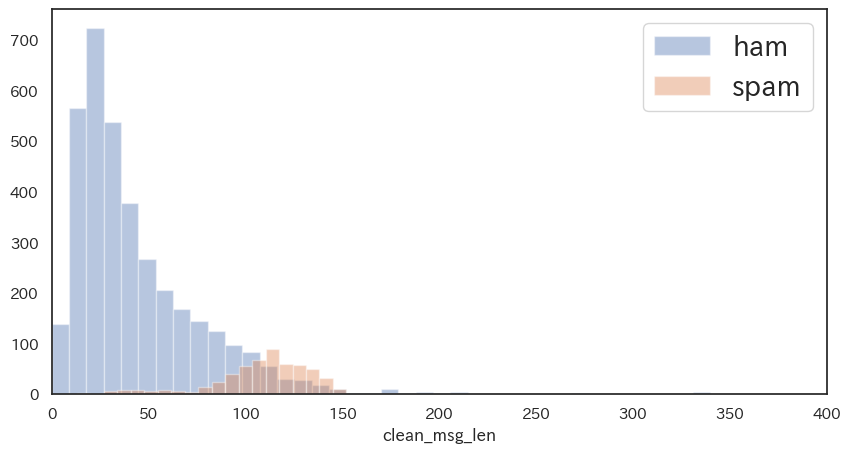

In [ ]:
#クリーニングした文章の文字数をカウント
df['clean_msg_len'] = df.clean_msg.apply(len)
df_test['clean_msg_len'] = df_test.clean_msg.apply(len)
plt.figure(figsize=(10,5))
sns.distplot(df[df["Class"] == "ham"]["clean_msg_len"], kde=False, label="ham");
sns.distplot(df[df["Class"] == "spam"]["clean_msg_len"], kde=False, label="spam");
plt.legend(fontsize=20)
plt.xlim(0,400)

<ipython-input-35-5675037d8fb1>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df["Class"]=="ham"]["msg_diff"],kde=False,label="ham");
<ipython-input-35-5675037d8fb1>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df["Class"]=="spam"]["msg_diff"],kde=False,label="spam");


(0.0, 400.0)

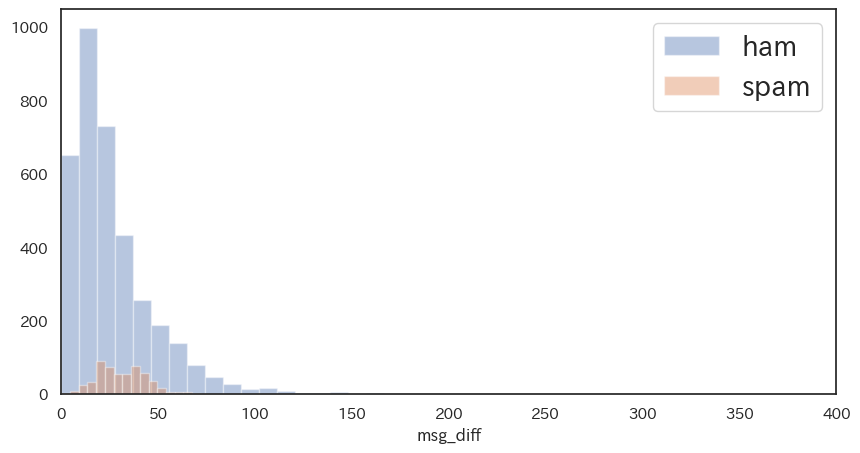

In [ ]:
#クリーニング前後の文字数の差を算出
df['msg_diff'] = df["Message_len"] - df["clean_msg_len"]
df_test['msg_diff'] = df_test["Message_len"] - df_test["clean_msg_len"]
plt.figure(figsize=(10, 5))
sns.distplot(df[df["Class"] == "ham"]["msg_diff"], kde=False, label="ham");
sns.distplot(df[df["Class"] == "spam"]["msg_diff"], kde=False, label="spam");
plt.legend(fontsize=20)
plt.xlim(0,400)

##前処理(BoWの形に変換)

In [ ]:
#Class列をダミー変数化
df["spam"]=df["Class"].apply(lambda x: 1 if x == "spam" else 0)
df.head()

,ID,Class,Message,exc_len,Message_len,clean_msg,clean_msg_len,msg_diff,spam
0,1,ham,"Go until jurong point, crazy.. Available only ...",0,111,go jurong point crazy available bugis n great ...,82,29,0
1,2,ham,Ok lar... Joking wif u oni...,0,29,ok lar joking wif u oni,23,6,0
2,3,spam,Free entry in 2 a wkly comp to win FA Cup fina...,0,155,free entry 2 wkly comp win fa cup final tkts 2...,134,21,1
3,5,ham,"Nah I don't think he goes to usf, he lives aro...",0,61,nah think goes usf lives around though,38,23,0
4,6,spam,FreeMsg Hey there darling it's been 3 week's n...,2,147,freemsg hey darling 3 week word back like fun ...,84,63,1


In [ ]:
#クリーニングした文章を使ってBoWのデータフレームを作成
X = df["clean_msg"]
y = df["spam"]
testX = df_test["clean_msg"]

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
#CountVectorizerで単語の出現数をカウントしたデータフレームを作成
vect = CountVectorizer()
X_dtm = vect.fit_transform(X)
X_dtm_test=vect.transform(testX)
#TFidf変換(各単語ごとに出現数の重み付けを行うことで、出現頻度の低い単語の重要度を上げる)
tfidf_transformer = TfidfTransformer()
tfidf_transformer.fit(X_dtm)
X_dtm = tfidf_transformer.transform(X_dtm)
X_dtm_test = tfidf_transformer.transform(X_dtm_test)
#ここまででBoW変換が完了

#BoWに文章の長さと「!」の数を特徴量として追加
X_dtm_df = pd.DataFrame(X_dtm.toarray(), columns=vect.get_feature_names_out())
X_dtm_df["Message_len"] = df["Message_len"]
X_dtm_df["exc_len"] = df["exc_len"]
X_dtm_df["clean_msg_len"] = df["clean_msg_len"]
X_dtm_df["msg_diff"] = df["msg_diff"]
X_dtm_df.head()

,00,000,000pes,008704050406,0121,01223585236,01223585334,0125698789,02,0207,...,zed,zeros,zoe,zogtorius,zoom,zouk,Message_len,exc_len,clean_msg_len,msg_diff
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,111,0,82,29
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,29,0,23,6
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,155,0,134,21
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,61,0,38,23
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,147,2,84,63


In [ ]:
#テストデータも同様の作業を実行
X_dtm_test_df = pd.DataFrame(X_dtm_test.toarray(), columns=vect.get_feature_names_out())
X_dtm_test_df["Message_len"] = df_test["Message_len"]
X_dtm_test_df["exc_len"] = df_test["exc_len"]
X_dtm_test_df["clean_msg_len"] = df_test["clean_msg_len"]
X_dtm_test_df["msg_diff"] = df_test["msg_diff"]
X_dtm_test_df.head()

,00,000,000pes,008704050406,0121,01223585236,01223585334,0125698789,02,0207,...,zed,zeros,zoe,zogtorius,zoom,zouk,Message_len,exc_len,clean_msg_len,msg_diff
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,49,0,35,14
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,160,0,113,47
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,26,0,13,13
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,81,0,51,30
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,49,0,31,18


##予測、評価

In [ ]:
#決定木分析モデルを構築し、5分割クロスバリデーションにてF1scoreとaccuracyを出力
from sklearn.model_selection import KFold
from sklearn.metrics import f1_score,accuracy_score
from sklearn import tree
from IPython.display import Image
import pydotplus
from six import StringIO
f1scores=[]
accuracys=[]
kf = KFold(n_splits=5, shuffle=True, random_state=1)
for tr_idx, va_idx in kf.split(X_dtm_df):
    X_train, X_test = X_dtm_df.iloc[tr_idx], X_dtm_df.iloc[va_idx]
    y_train, y_test = y.iloc[tr_idx], y.iloc[va_idx]
    clf = tree.DecisionTreeClassifier(max_depth=30)
    clf = clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    f1score = f1_score(y_test, y_pred)
    f1scores.append(f1score)
    accuracy = accuracy_score(y_test, y_pred)
    accuracys.append(accuracy)
print("F1score: ", np.mean(f1scores))
print("Accuracy: ", np.mean(accuracys))

#tf-idfなしもほぼ同じf1score

F1score: 0.8726794481136466
Accuracy: 0.9676947540326047


In [ ]:
#各特徴量の重要度を算出
feature_importance = clf.feature_importances_
importances = pd.DataFrame({"特徴量":X_dtm_df.columns, "重要度" : feature_importance})
importances = importances.sort_values("重要度", ascending=False).reset_index(drop=True)
importances.head(20)

,特徴量,重要度
0,clean_msg_len,0.404712
1,msg_diff,0.129163
2,call,0.067207
3,txt,0.048198
4,www,0.034143
5,stop,0.028084
6,uk,0.017443
7,service,0.015224
8,text,0.014622
9,ringtone,0.012581


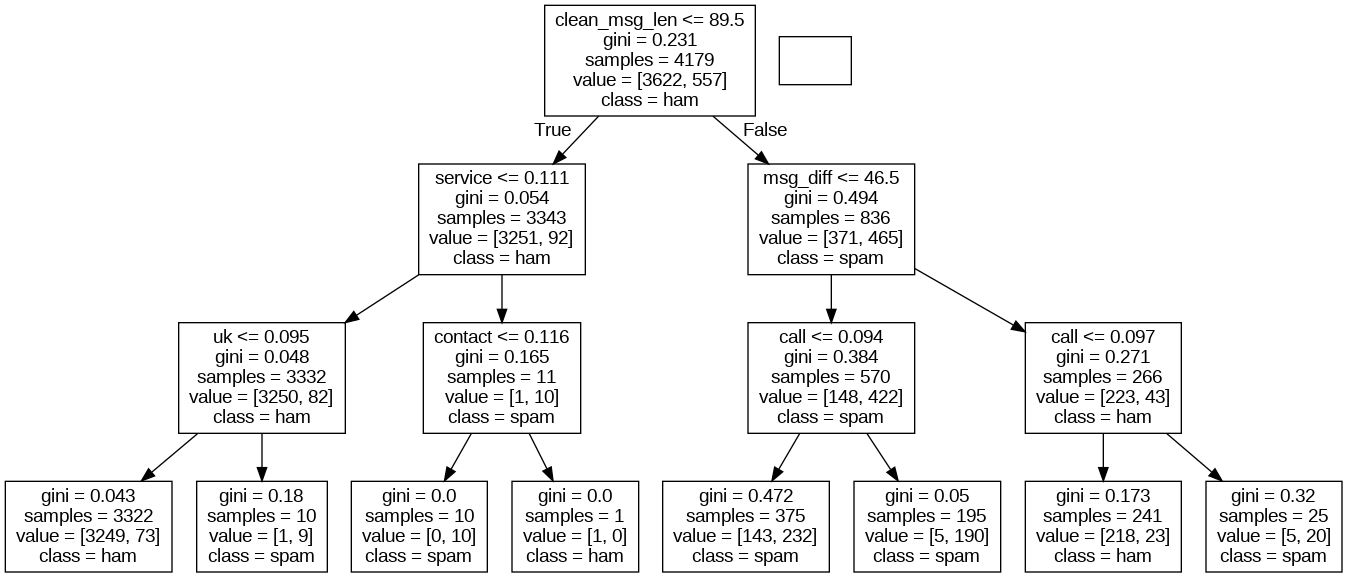

In [ ]:
#分岐を減らして決定木を可視化
clf = tree.DecisionTreeClassifier(max_depth=3)
clf = clf.fit(X_dtm_df, y)
dot_data = StringIO()
tree.export_graphviz(clf, out_file=dot_data, feature_names=X_dtm_df.columns, class_names=["ham", "spam"])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

スパムの特徴
*   文字数が多い
*   アルファベット以外の記号や空白、ストップワードが多い
*   「service,call,uk,contact」などの文字がよく使われている

In [ ]:
#学習データ全体で学習し、予測
clf = tree.DecisionTreeClassifier(max_depth=30)
clf = clf.fit(X_dtm_df, y)
y_pred = clf.predict(X_dtm_test_df)
df_test["y"] = y_pred
df_test.head()

,ID,Message,exc_len,Message_len,clean_msg,clean_msg_len,msg_diff,y
0,4,U dun say so early hor... U c already then say...,0,49,u dun say early hor u c already say,35,14,0
1,8,As per your request 'Melle Melle (Oru Minnamin...,0,160,per request melle melle oru minnaminunginte nu...,113,47,0
2,17,Oh k...i'm watching here:),0,26,oh k watching,13,13,0
3,18,Eh u remember how 2 spell his name... Yes i di...,0,81,eh u remember 2 spell name yes v naughty make ...,51,30,0
4,22,I���m going to try for 2 months ha ha only joking,0,49,going try 2 months ha ha joking,31,18,0


In [ ]:
#submitデータ作成
df_submit = df_test[["ID","y"]]
df_submit.to_csv("spam_submit", index=False)

#最終F1-score 0.913(tf-idfあり)
#最終F1-score 0.887(tf-idfなし)

In [ ]:
#おまけ(lightGBMでやってみると？)
f1scores = []
accuracys = []
import lightgbm as lgb
for tr_idx, va_idx in kf.split(X_dtm_df):
    X_train,X_test = X_dtm_df.iloc[tr_idx], X_dtm_df.iloc[va_idx]
    y_train,y_test = y.iloc[tr_idx], y.iloc[va_idx]
    lgb_train = lgb.Dataset(X_train, y_train)
    lgb_eval = lgb.Dataset(X_test, y_test, reference=lgb_train)
    params = {"objective": "binary", "metrics": "binary_logloss", "boosting_type": "gbdt","num_leaves": 23, "learning_rate": 0.1, "feature_fraction": 1.0, "min_data_in_leaf": 20}
    model = lgb.train(params, lgb_train, valid_sets=[lgb_train, lgb_eval], num_boost_round=2000, early_stopping_rounds=100, verbose_eval=50)
    y_pred = model.predict(X_test)
    y_pred = np.where(y_pred>=0.5, 1, 0)
    f1score = f1_score(y_test, y_pred)
    f1scores.append(f1score)
    accuracy = accuracy_score(y_test, y_pred)
    accuracys.append(accuracy)
print("F1score: ", np.mean(f1scores))
print("Accuracy: ", np.mean(accuracys))

/usr/local/lib/python3.9/dist-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.9/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Info] Number of positive: 455, number of negative: 2888
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.014888 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4983
[LightGBM] [Info] Number of data points in the train set: 3343, number of used features: 281
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.136105 -> initscore=-1.848022
[LightGBM] [Info] Start training from score -1.848022
Training until validation scores don't improve for 100 rounds
[50]	training's binary_logloss: 0.0300442	valid_1's binary_logloss: 0.0877286
[100]	training's binary_logloss: 0.00751991	valid_1's binary_logloss: 0.0914621
[150]	training's binary_logloss: 0.00229014	valid_1's binary_logloss: 0.100029
Early stopping, best iteration is:
[54]	training's binary_logloss: 0.0266053	valid_1's binary_logloss: 0.0873721


/usr/local/lib/python3.9/dist-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.9/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Info] Number of positive: 433, number of negative: 2910
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012976 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4799
[LightGBM] [Info] Number of data points in the train set: 3343, number of used features: 267
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.129524 -> initscore=-1.905171
[LightGBM] [Info] Start training from score -1.905171
Training until validation scores don't improve for 100 rounds
[50]	training's binary_logloss: 0.0306273	valid_1's binary_logloss: 0.0705181
[100]	training's binary_logloss: 0.00828617	valid_1's binary_logloss: 0.062299
[150]	training's binary_logloss: 0.00259178	valid_1's binary_logloss: 0.066853
[200]	training's binary_logloss: 0.000871432	valid_1's binary_logloss: 0.0762636
Early stopping, best iteration is:
[106]	training's binary_logloss: 0.00715712	valid_1's binary_logloss: 0.0621278


/usr/local/lib/python3.9/dist-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.9/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Info] Number of positive: 445, number of negative: 2898
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005206 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4746
[LightGBM] [Info] Number of data points in the train set: 3343, number of used features: 262
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.133114 -> initscore=-1.873702
[LightGBM] [Info] Start training from score -1.873702
Training until validation scores don't improve for 100 rounds
[50]	training's binary_logloss: 0.0252847	valid_1's binary_logloss: 0.0910499
[100]	training's binary_logloss: 0.00536994	valid_1's binary_logloss: 0.0929709
[150]	training's binary_logloss: 0.00142795	valid_1's binary_logloss: 0.102598
Early stopping, best iteration is:
[71]	training's binary_logloss: 0.0124588	valid_1's binary_logloss: 0.0903518


/usr/local/lib/python3.9/dist-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.9/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Info] Number of positive: 441, number of negative: 2902
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005681 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4790
[LightGBM] [Info] Number of data points in the train set: 3343, number of used features: 265
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.131917 -> initscore=-1.884111
[LightGBM] [Info] Start training from score -1.884111
Training until validation scores don't improve for 100 rounds
[50]	training's binary_logloss: 0.0288992	valid_1's binary_logloss: 0.0852279
[100]	training's binary_logloss: 0.00749579	valid_1's binary_logloss: 0.0801066
[150]	training's binary_logloss: 0.0023541	valid_1's binary_logloss: 0.0902183
Early stopping, best iteration is:
[85]	training's binary_logloss: 0.0108538	valid_1's binary_logloss: 0.079797


/usr/local/lib/python3.9/dist-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.9/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Info] Number of positive: 454, number of negative: 2890
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005134 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4774
[LightGBM] [Info] Number of data points in the train set: 3344, number of used features: 264
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.135766 -> initscore=-1.850915
[LightGBM] [Info] Start training from score -1.850915
Training until validation scores don't improve for 100 rounds
[50]	training's binary_logloss: 0.0313448	valid_1's binary_logloss: 0.0657085
[100]	training's binary_logloss: 0.00803316	valid_1's binary_logloss: 0.0528095
[150]	training's binary_logloss: 0.00254258	valid_1's binary_logloss: 0.050706
[200]	training's binary_logloss: 0.000797151	valid_1's binary_logloss: 0.0545925
Early stopping, best iteration is:
[145]	training's binary_log